In [10]:
import sys 
sys.path.append('../')
import cox 
from cox.store import Store
from cox.readers import CollectionReader 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch as ch 
from torch import Tensor
from torch.distributions import Uniform
import os 

from delphi import train
from delphi.utils import model_utils
from delphi.utils.datasets import CIFAR
# set environment variable so that stores can create output files
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [2]:
BASE_CLASSIFIER = '/home/gridsan/stefanou/cifar10/resnet18/308eb961-a388-40f7-95ca-69c9ef7550c1/checkpoint.pt.best'
reader = CollectionReader('/home/gridsan/stefanou/cifar10/resnet18/')
logs = reader.df('logs')
reader.close()
logs.head()

100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


epoch  val_prec1   val_loss  train_prec1  train_loss       time  \
0      1  29.509998  14.191447    23.792000    5.100472  19.386131   
1      2  28.650000  15.349252    33.180000    4.319762  38.048808   
2      3  42.410000   1.797574    36.674000    2.697654  56.439867   
3      4  46.840000   4.615719    46.261997    1.938068  74.716843   
4      5  51.110001   1.347270    48.188000    1.697485  93.085738   

                                 exp_id  
0  308eb961-a388-40f7-95ca-69c9ef7550c1  
1  308eb961-a388-40f7-95ca-69c9ef7550c1  
2  308eb961-a388-40f7-95ca-69c9ef7550c1  
3  308eb961-a388-40f7-95ca-69c9ef7550c1  
4  308eb961-a388-40f7-95ca-69c9ef7550c1

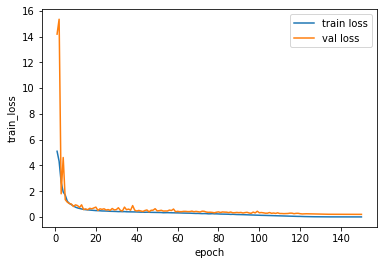

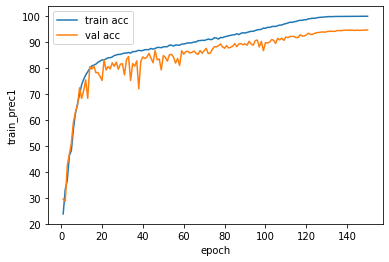

In [3]:
sns.lineplot(data=logs, x='epoch', y='train_loss', label='train loss')
sns.lineplot(data=logs, x='epoch', y='val_loss', label='val loss')
plt.show()

sns.lineplot(data=logs, x='epoch', y='train_prec1', label='train acc')
sns.lineplot(data=logs, x='epoch', y='val_prec1', label='val acc')
plt.show()

In [8]:
ds = CIFAR(data_path='/home/gridsan/stefanou/data')
train_loader, val_loader = ds.make_loaders(batch_size=128, workers=8)
base = model_utils.make_and_restore_model(arch='resnet18', dataset=ds, resume_path=BASE_CLASSIFIER)

Files already downloaded and verified
Files already downloaded and verified
=> loading checkpoint '/home/gridsan/stefanou/cifar10/resnet18/308eb961-a388-40f7-95ca-69c9ef7550c1/checkpoint.pt.best'
=> loaded checkpoint '/home/gridsan/stefanou/cifar10/resnet18/308eb961-a388-40f7-95ca-69c9ef7550c1/checkpoint.pt.best' (epoch 150)


In [17]:
args = cox.utils.Parameters({'device': 'cuda', 'accuracy': True})
base_train_results = train.eval_model(args, base[0], train_loader, None)
print("base train results: ", base_train_results)

base_val_results = train.eval_model(args, base[0], val_loader, None)
print("base val results: ", base_val_results)

output:  (tensor([[-1.5365e+00, -1.0593e+00, -5.0255e-01,  ...,  1.1919e+01,
         -2.3208e+00, -8.4188e-03],
        [ 7.9941e-01, -6.1492e-01, -1.3630e+00,  ..., -1.5090e+00,
          9.8478e+00, -1.7430e-02],
        [-1.0902e+00, -4.0303e-01, -1.9863e-01,  ..., -7.4037e-01,
         -1.6239e+00, -1.1064e+00],
        ...,
        [-1.0882e+00,  9.4709e+00, -1.3946e+00,  ..., -1.2563e+00,
          5.2577e-01, -7.1916e-01],
        [-5.7057e-01, -8.0427e-01, -1.9057e+00,  ..., -4.8074e-02,
         -1.5382e+00, -1.8108e+00],
        [-2.1275e-01, -7.3480e-01, -3.9222e-01,  ..., -9.5050e-01,
          7.9242e+00,  1.7772e-02]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.6275, 0.6510, 0.6510,  ..., 1.0000, 1.0000, 0.0000],
          [1.0000, 1.0000, 1.0000,  

output:  (tensor([[-1.6072e+00, -6.9645e-01, -1.3107e+00,  ...,  1.0231e+01,
         -1.7426e+00, -1.0243e+00],
        [-4.9329e-01,  1.0237e+00, -1.1074e+00,  ..., -2.0127e+00,
         -8.1804e-01,  1.0185e+01],
        [ 1.0514e+01, -2.3927e+00, -5.3959e-01,  ..., -2.5331e+00,
         -2.4664e+00, -1.6285e+00],
        ...,
        [-9.8444e-01, -1.5928e+00, -3.2433e-01,  ...,  1.2164e+01,
         -2.1302e+00, -4.0661e-01],
        [-1.1054e+00, -1.4052e+00, -2.5077e-01,  ..., -1.9854e-01,
          4.2453e-01, -1.2875e+00],
        [ 9.8239e+00, -1.1354e+00, -5.3228e-01,  ..., -9.7314e-01,
         -3.9549e-03, -7.3329e-01]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.2549, 0.2157, 0.3255,  ..., 0.4588, 0.4196, 0.3333],
          [0.2941, 0.2588, 0.3569,  

output:  (tensor([[ 1.8982,  7.7609, -1.6040,  ..., -1.9839,  0.0900,  0.3529],
        [-1.1920, -0.5652, -0.2953,  ..., -0.2175, -1.7906, -0.7264],
        [-1.0603, -1.0653, -1.6693,  ...,  9.1883, -1.6536, -0.7428],
        ...,
        [-1.2018, -2.6321,  0.4836,  ..., -0.5646, -1.6528, -1.5729],
        [-0.0482, -2.0008,  1.9691,  ..., -0.0540, -2.0924, -1.2526],
        [-0.0768, -1.8275, -0.3171,  ..., -1.2989, -0.7536, -1.2736]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0392, 0.0392, 0.0392,  ..., 0.0392, 0.0392, 0.0392],
          [0.0392, 0.0392, 0.0392,  ..., 0.0392, 0.0392, 0.0392],
          [0.0392, 0.0392, 0.0392,  ..., 0.0392, 0.0392, 0.0392],
          ...,
          [0.0392, 0.1137, 0.1373,  ..., 0.6431, 0.8157, 0.8157],
          [0.0392, 0.0902, 0.1373,  ..., 0.7804, 0.8157, 0.8196],
          [0.0392, 0.0941, 0.1529,  ..., 0.8157, 0.8196, 0.8196]],

         [[0.0392, 0.0392, 0.0392,  ..., 0.0392, 0.0392, 0.0392],
          [0.0392, 0.0392, 

output:  (tensor([[ 0.5050,  0.4753, -1.9096,  ..., -2.2403, 11.0351, -0.2246],
        [-1.6967, -1.4747,  0.7792,  ..., -1.6952, -1.3011, -1.1836],
        [-1.0392, -0.0540, -0.1088,  ..., -1.4712,  8.6355, -0.2978],
        ...,
        [-0.9097, -1.5239,  3.0767,  ...,  0.1662, -2.2684, -0.0888],
        [ 1.9276, -0.5456,  0.0521,  ..., -0.2359, -1.8860, -0.1752],
        [-1.8032, -2.4991,  0.1823,  ..., -0.7681, -0.5134, -1.1507]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.7529, 0.7333, 0.7412,  ..., 0.6196, 0.0039, 0.0039],
          [0.7725, 0.7412, 0.7529,  ..., 0.5961, 0.0039, 0.0039],
          [0.7686, 0.7412, 0.7333,  ..., 0.5686, 0.0039, 0.0039],
          ...,
          [0.6549, 0.6510, 0.6471,  ..., 0.3098, 0.0039, 0.0039],
          [0.4745, 0.4510, 0.5020,  ..., 0.3176, 0.0039, 0.0039],
          [0.4392, 0.4078, 0.4588,  ..., 0.3216, 0.0039, 0.0039]],

         [[0.7529, 0.7333, 0.7412,  ..., 0.6196, 0.0039, 0.0039],
          [0.7725, 0.7412, 

output:  (tensor([[10.0563, -1.6491, -0.5636,  ..., -2.0939, -1.7855, -0.6054],
        [ 0.2447, -0.4952, -1.0619,  ..., -0.9623,  8.4146, -0.6685],
        [-1.5498, -0.5463,  0.3516,  ..., -0.8564, -1.7549, -0.9985],
        ...,
        [-1.5385, -1.0751, -0.9746,  ...,  8.6619, -1.7591, -1.5467],
        [-3.0125, -1.6394, -0.3723,  ..., -0.4356, -2.5547, -1.3981],
        [ 0.3293, -1.8982,  8.6557,  ..., -2.8148, -1.3931, -1.2267]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.4392, 0.4471, 0.4588,  ..., 0.0000, 0.0000, 0.0000],
          [0.4431, 0.4471, 0.4431,  ..., 0.0000, 0.0000, 0.0000],
          [0.4078, 0.4314, 0.4275,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.5647, 0.5765, 0.5804,  ..., 0.0000, 0.0000, 0.0000],
          [0.5765, 0.5804, 

output:  (tensor([[-1.6669, -1.6417,  0.1815,  ..., -1.4689, -1.9517, -1.0002],
        [-1.8409, -2.4013, -1.5500,  ..., -0.4228, -1.8174, -0.6216],
        [-2.2124,  9.5031, -0.8108,  ..., -0.5572, -0.7659, -0.1308],
        ...,
        [ 9.9198, -0.3361, -0.0107,  ..., -0.7279, -0.3965, -0.2474],
        [-1.0052, -1.6535, -0.1864,  ...,  0.0915, -1.5096, -1.8525],
        [-0.1835,  0.4427, -2.1514,  ...,  0.6564,  7.6879, -0.4555]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
          [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
          [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
          ...,
          [0.0275, 0.0275, 0.0275,  ..., 0.7647, 0.8196, 0.8039],
          [0.0275, 0.0275, 0.0275,  ..., 0.8157, 0.7804, 0.7294],
          [0.0275, 0.0275, 0.0275,  ..., 0.8627, 0.8275, 0.7647]],

         [[0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
          [0.0275, 0.0275, 

output:  (tensor([[-1.6122, -2.0072, -0.9215,  ..., -2.0860, -1.4140, -1.5092],
        [14.7096, -1.2363,  0.1592,  ..., -3.0455, -1.1143, -1.6829],
        [-2.4591, -0.1751,  1.7002,  ..., -0.9179, -2.8299, -1.0645],
        ...,
        [-1.5351,  7.8009, -2.1692,  ..., -1.0481, -1.7120,  3.6849],
        [-0.8535,  7.7457, -1.0716,  ..., -1.1378,  0.0325, -0.5440],
        [ 0.4617,  0.5055, -1.3356,  ...,  8.0077, -1.5078, -1.2801]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0549, 0.0510, 0.0706,  ..., 0.3176, 0.0863, 0.0157],
          [0.0588, 0.0627, 0.0667,  ..., 0.5451, 0.2667, 0.0157],
          [0.0667, 0.0549, 0.0549,  ..., 0.4235, 0.3412, 0.0157],
          ...,
          [0.0510, 0.0706, 0.0902,  ..., 0.0784, 0.0706, 0.0157],
          [0.0784, 0.0549, 0.0510,  ..., 0.0784, 0.0784, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157]],

         [[0.0902, 0.0863, 0.1059,  ..., 0.2863, 0.1059, 0.0157],
          [0.0941, 0.0980, 

output:  (tensor([[ 1.1881, -1.8923,  0.4072,  ..., -2.3852, -2.5908, -0.3769],
        [-0.3221,  9.0559, -1.9000,  ..., -1.9899,  0.9716,  0.4159],
        [-0.6563, -0.5126,  7.7491,  ..., -1.2260, -1.1287, -0.9782],
        ...,
        [-0.8335, -1.4272, -1.4821,  ...,  9.9275, -1.0444, -1.0811],
        [ 0.4371, -1.1538,  9.1524,  ..., -0.0372, -1.9738, -0.2411],
        [ 0.4166, -0.6212, -2.5217,  ..., -2.9968, 12.9134,  0.3857]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.6627, 0.5843, 0.6000,  ..., 0.1020, 0.1020, 0.1020],
          [0.5922, 0.6392, 0.6588,  ..., 0.1020, 0.1020, 0.1020],
          [0.4353, 0.5255, 0.5725,  ..., 0.1020, 0.1020, 0.1020],
          ...,
          [0.1020, 0.1020, 0.1020,  ..., 0.1020, 0.1020, 0.1020],
          [0.1020, 0.1020, 0.1020,  ..., 0.1020, 0.1020, 0.1020],
          [0.1020, 0.1020, 0.1020,  ..., 0.1020, 0.1020, 0.1020]],

         [[0.6706, 0.5882, 0.6039,  ..., 0.1020, 0.1020, 0.1020],
          [0.5961, 0.6392, 

output:  (tensor([[-1.5261, -0.5723,  0.1303,  ...,  1.8345, -1.7442,  8.2694],
        [-0.9532, -0.5970,  8.3208,  ..., -3.2592, -1.7488, -0.8733],
        [-0.4245, -1.6075, -1.5904,  ..., -1.7158,  0.8142,  7.3567],
        ...,
        [-0.6852, -1.4383,  9.9313,  ..., -1.8590, -0.8866, -0.7863],
        [-0.4607, -1.5159,  0.0382,  ..., -0.9635, -1.0214, -1.0421],
        [ 0.4083, -0.1364,  8.5077,  ..., -1.6729, -0.2556, -1.8688]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.3569, 0.1804, 0.1451,  ..., 0.4745, 0.4314, 0.0000],
          [0.4314, 0.4275, 0.1569,  ..., 0.4667, 0.4275, 0.0000],
          [0.4353, 0.4706, 0.3059,  ..., 0.4784, 0.4157, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 

output:  (tensor([[ 0.1182, -0.7274, -0.6685,  ..., -1.5587, -1.1016, -1.1493],
        [-1.4898, -2.8729, -1.3830,  ..., -2.0974,  0.4880, -0.1737],
        [-1.0535, -1.3406, -0.3877,  ..., -0.6653, -1.5881, -0.9825],
        ...,
        [-1.3912, -0.4654,  7.7680,  ..., -3.0198, -2.3768, -1.5099],
        [-1.1922, -1.8262, -0.0524,  ...,  0.9146, -1.7115, -1.3970],
        [-0.6140,  9.1597, -1.1526,  ..., -2.1432,  0.1365,  0.4290]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.2078, 0.1961,  ..., 0.2471, 0.2627, 0.2471],
          [0.0000, 0.1843, 0.2078,  ..., 0.3098, 0.3176, 0.2980],
          [0.0000, 0.2235, 0.2353,  ..., 0.2471, 0.2431, 0.2314],
          ...,
          [0.0000, 0.3804, 0.3765,  ..., 0.3922, 0.3961, 0.3804],
          [0.0000, 0.3882, 0.3765,  ..., 0.3804, 0.3961, 0.3922],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.2392, 0.2196,  ..., 0.3216, 0.3333, 0.3020],
          [0.0000, 0.2157, 

output:  (tensor([[-1.0560, -1.7032, 10.8074,  ..., -1.0091, -1.4477, -0.3799],
        [-0.8061, -0.4596, -1.5131,  ..., -1.0033, -2.5364, -0.2847],
        [ 0.1821, -1.9532,  0.9697,  ..., -0.5923, -2.3467, -1.4453],
        ...,
        [-0.9540,  9.0624, -0.9974,  ..., -1.3404, -0.0222,  0.0344],
        [ 0.0112, -2.2244, -0.2112,  ..., -0.8917, -1.4209, -1.7749],
        [-1.1768,  8.3254, -2.9451,  ..., -1.2958, -0.1536,  1.1732]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.1765, 0.1882, 0.2000,  ..., 0.0549, 0.0549, 0.0549],
          [0.1804, 0.2549, 0.2549,  ..., 0.0549, 0.0549, 0.0549],
          [0.1647, 0.2549, 0.3373,  ..., 0.0549, 0.0549, 0.0549],
          ...,
          [0.0549, 0.0549, 0.0549,  ..., 0.0549, 0.0549, 0.0549],
          [0.0549, 0.0549, 0.0549,  ..., 0.0549, 0.0549, 0.0549],
          [0.0549, 0.0549, 0.0549,  ..., 0.0549, 0.0549, 0.0549]],

         [[0.1451, 0.1529, 0.1804,  ..., 0.0549, 0.0549, 0.0549],
          [0.1373, 0.2157, 

output:  (tensor([[-0.6188, -0.9853, -0.0348,  ..., -1.4097, -0.9602, -1.4485],
        [-1.5485, -2.0431, -0.7831,  ..., -1.7834, -1.9585, -1.6893],
        [-1.7064, -1.5868,  9.6118,  ...,  0.1146, -1.8513, -0.7638],
        ...,
        [ 8.6714, -1.2216, -0.2755,  ..., -0.8647, -0.9154, -0.9782],
        [ 9.0697, -1.4629, -0.2545,  ..., -1.2392,  0.1425, -0.3820],
        [-0.8184, -1.8732, 10.9970,  ..., -2.1553, -0.7277, -1.9721]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.8314, 0.8588, 0.8196,  ..., 0.6667, 0.0824, 0.0824],
          [0.8549, 0.8784, 0.7020,  ..., 0.6706, 0.0824, 0.0824],
          [0.8549, 0.7882, 0.4784,  ..., 0.6706, 0.0824, 0.0824],
          ...,
          [0.0824, 0.0824, 0.0824,  ..., 0.0824, 0.0824, 0.0824],
          [0.0824, 0.0824, 0.0824,  ..., 0.0824, 0.0824, 0.0824],
          [0.0824, 0.0824, 0.0824,  ..., 0.0824, 0.0824, 0.0824]],

         [[0.7451, 0.7686, 0.7451,  ..., 0.6000, 0.0824, 0.0824],
          [0.7412, 0.7843, 

output:  (tensor([[-1.8411e+00, -1.1061e+00, -1.0256e+00,  ...,  1.1072e+01,
         -1.9993e+00, -1.2428e+00],
        [-8.5193e-01,  8.5231e+00, -1.2390e+00,  ..., -1.5498e+00,
         -7.9445e-02,  1.6317e-01],
        [-3.1689e-01, -5.5344e-01, -6.0350e-01,  ..., -1.7390e+00,
          7.4296e+00,  1.6762e-01],
        ...,
        [ 9.9935e+00, -1.3667e+00, -5.5346e-01,  ..., -1.4003e+00,
          9.3143e-01, -9.2422e-01],
        [ 1.6013e+01, -2.0280e+00, -1.5128e+00,  ..., -2.6393e+00,
          1.5486e-03, -2.1132e+00],
        [ 1.2615e-01, -3.3261e-01, -5.9264e-01,  ..., -1.8428e+00,
          8.2387e+00, -3.7145e-01]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0196, 0.0196,  ..., 0.0196, 0.0196, 0.0000],
          [0.0196, 0.0196, 0.0196,  ..., 0.0196, 0.0196, 0.0196],
          [0.0196, 0.0196, 0.0196,  ..., 0.0196, 0.0196, 0.0196],
          ...,
          [0.2980, 0.2980, 0.2980,  ..., 0.0196, 0.0196, 0.0196],
          [0.2980, 0.3059, 0.2941,  

output:  (tensor([[-1.0906e+00, -9.5630e-01, -1.1417e+00,  ..., -6.9079e-01,
         -1.8146e+00, -1.2138e+00],
        [ 1.0006e+01, -1.2845e+00, -3.9105e-02,  ..., -1.2497e+00,
         -3.8982e-01, -1.0588e+00],
        [-7.2755e-01,  5.4242e-03, -1.2075e+00,  ..., -3.6300e-01,
         -2.2122e+00, -5.9073e-01],
        ...,
        [-8.6703e-01, -4.0595e-02, -4.8896e-01,  ..., -1.1063e+00,
         -1.9195e+00, -7.7680e-01],
        [ 7.7556e+00, -6.0621e-01, -9.1275e-01,  ..., -1.1514e+00,
         -3.7330e-01, -6.6871e-01],
        [-1.3030e+00, -1.3450e+00, -4.8333e-01,  ..., -1.4673e+00,
         -8.7915e-01, -1.3109e+00]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.7333, 0.7255, 0.7137,  ..., 0.0000, 0.0000, 0.0000],
          [0.7451, 0.7333, 0.7216,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.6824, 0.7294, 0.7255,  ..., 0.0000, 0.0000, 0.0000],
          [0.6745, 0.6784, 0.7137,  

output:  (tensor([[-0.6071, -2.0933,  7.0401,  ..., -2.3111, -1.3075, -1.5483],
        [11.2830, -0.4998, -0.4027,  ..., -1.9567,  0.5294, -1.2318],
        [-0.8926, -0.8925,  7.9151,  ...,  0.1579, -2.5974, -0.4326],
        ...,
        [-0.3178,  9.0189, -1.8622,  ..., -1.3542, -0.4877,  0.6296],
        [ 2.0902, -2.6764, -1.8368,  ..., -1.7880, -2.5714, -1.6534],
        [ 2.3636,  0.4871, -2.6089,  ..., -1.7825,  9.7243, -1.1547]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.4784, 0.4824, 0.4353,  ..., 0.5373, 0.6314, 0.0000],
          [0.4667, 0.4863, 0.4549,  ..., 0.5569, 0.6118, 0.0000],
          [0.4824, 0.5176, 0.4784,  ..., 0.5843, 0.5804, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.4784, 0.4863, 0.4392,  ..., 0.4549, 0.5608, 0.0000],
          [0.4667, 0.4627, 

output:  (tensor([[-1.2156e+00, -7.8928e-01, -1.4421e-01,  ..., -1.1784e+00,
         -1.3434e+00, -1.0310e+00],
        [-1.7742e+00, -1.5935e+00,  3.1811e-02,  ..., -1.1647e+00,
         -2.8632e+00, -6.0484e-01],
        [-2.0356e+00, -1.3082e+00,  7.9346e-02,  ..., -1.2092e+00,
         -1.3721e+00,  1.0301e+00],
        ...,
        [-1.8543e+00, -4.7246e-01, -1.4181e+00,  ...,  9.9397e+00,
         -1.8598e+00, -8.3576e-01],
        [ 2.6804e-01, -8.0183e-01, -8.4234e-01,  ..., -1.4106e+00,
          9.6884e+00, -5.2894e-01],
        [ 4.9794e-03, -2.1869e+00, -7.7039e-01,  ..., -1.5386e+00,
         -1.1900e+00, -1.6341e+00]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0431, 0.0431, 0.3059,  ..., 0.4627, 0.4627, 0.4471],
          [0.0431, 0.0431, 0.2980,  ..., 0.4627, 0.4549, 0.4235],
          [0.0431, 0.0431, 0.3176,  ..., 0.4157, 0.4039, 0.3882],
          ...,
          [0.0431, 0.0431, 0.3647,  ..., 0.3882, 0.3922, 0.4000],
          [0.0431, 0.0431, 0.3882,  

output:  (tensor([[ 0.9676, -1.8046,  0.5611,  ..., -0.7578, -1.5487, -1.8873],
        [-0.4244, -2.5092, -1.1174,  ...,  0.4965, -0.8917, -1.4714],
        [11.1269, -0.1437,  0.4849,  ..., -0.8853, -1.8563,  0.5011],
        ...,
        [-0.7790, -2.0450,  0.2034,  ..., -0.9883, -1.2446, -1.7318],
        [-0.3203, -1.8019, -0.2577,  ...,  0.4042, -1.9437, -2.0467],
        [-0.7468, -0.9142, -0.5872,  ..., -1.4647, -0.4805, -0.2944]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.4118, 0.4275, 0.4431],
          [0.0000, 0.0000, 0.0000,  ..., 0.4392, 0.4392, 0.4706],
          [0.0000, 0.0000, 0.0000,  ..., 0.5176, 0.4941, 0.4627],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5882, 0.6353, 0.6235],
          [0.0000, 0.0000, 0.0000,  ..., 0.5333, 0.5882, 0.5725],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.2549, 0.2667, 0.2471],
          [0.0000, 0.0000, 

output:  (tensor([[-1.2985, -0.8577,  0.6697,  ..., -1.4710, -2.8017, -1.3857],
        [-0.5973, -1.6057, -0.2840,  ..., -0.7333, -1.6022, -1.5209],
        [-1.5402,  8.4448, -1.0853,  ..., -0.2671, -1.1530,  0.8742],
        ...,
        [-1.5988, -1.6354, -1.3141,  ..., 12.3990, -2.3699, -1.2872],
        [ 0.5031, -0.0725, -1.6644,  ..., -2.1311, 10.2595, -0.5736],
        [-1.3539, -2.1848,  0.2544,  ..., -0.9452, -2.8366, -1.8745]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0392, 0.0392, 0.0471,  ..., 0.1804, 0.1882, 0.2196],
          [0.0392, 0.0392, 0.0549,  ..., 0.2392, 0.2392, 0.2588],
          [0.0392, 0.0392, 0.0627,  ..., 0.2745, 0.2863, 0.2824],
          ...,
          [0.0392, 0.0392, 0.0549,  ..., 0.5765, 0.5333, 0.5176],
          [0.0392, 0.0392, 0.0392,  ..., 0.0392, 0.0392, 0.0392],
          [0.0392, 0.0392, 0.0392,  ..., 0.0392, 0.0392, 0.0392]],

         [[0.0392, 0.0392, 0.0471,  ..., 0.1804, 0.1882, 0.2196],
          [0.0392, 0.0392, 

output:  (tensor([[ 9.4169, -1.1788,  0.7985,  ..., -1.2390, -1.5915, -1.2600],
        [-0.4344, -0.6987,  8.3562,  ..., -1.7248, -0.8575,  0.1211],
        [-1.3101, -1.3581,  0.7588,  ..., -1.8081, -1.2628, -0.8364],
        ...,
        [-1.4498, -0.9524, -0.8302,  ..., 10.1816, -1.8570, -0.7940],
        [-1.5229, -1.3497, -1.1809,  ..., -0.8843, -1.7795, -1.1675],
        [-0.9464, -1.2343,  0.9046,  ..., -0.3740, -2.8248, -0.5825]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.6627, 0.6588, 0.6588,  ..., 0.5451, 0.5373, 0.5333],
          [0.6627, 0.6588, 0.6588,  ..., 0.5451, 0.5373, 0.5333],
          [0.6627, 0.6588, 0.6588,  ..., 0.5451, 0.5373, 0.5333],
          ...,
          [0.7529, 0.7569, 0.7882,  ..., 0.6078, 0.5882, 0.5529],
          [0.8039, 0.8157, 0.8275,  ..., 0.5961, 0.6039, 0.5725],
          [0.9608, 0.9647, 0.9451,  ..., 0.6275, 0.6706, 0.6784]],

         [[0.9255, 0.9216, 0.9216,  ..., 0.7569, 0.7529, 0.7490],
          [0.9255, 0.9216, 

output:  (tensor([[-1.7079, -1.3391, -1.7733,  ..., 11.5169, -1.8833, -1.4939],
        [-0.7405, -1.3252, -0.8699,  ...,  0.3075, -0.4853, -1.5497],
        [-0.6730,  8.1537, -1.2379,  ..., -1.7583, -0.5174,  0.1559],
        ...,
        [ 9.2513, -0.4757, -1.8182,  ..., -1.7462,  1.9211,  1.1135],
        [-0.7464,  1.1341, -1.2156,  ..., -1.5053, -1.0471,  9.6422],
        [-2.2687,  0.6612,  0.0403,  ..., -0.8177, -0.5535, -2.1824]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.2588, 0.2627, 0.3216,  ..., 0.4392, 0.0588, 0.0588],
          [0.2314, 0.2627, 0.3412,  ..., 0.3922, 0.0588, 0.0588],
          [0.2275, 0.2588, 0.3294,  ..., 0.3922, 0.0588, 0.0588],
          ...,
          [0.0588, 0.0588, 0.0588,  ..., 0.0588, 0.0588, 0.0588],
          [0.0588, 0.0588, 0.0588,  ..., 0.0588, 0.0588, 0.0588],
          [0.0588, 0.0588, 0.0588,  ..., 0.0588, 0.0588, 0.0588]],

         [[0.2627, 0.2667, 0.3333,  ..., 0.4784, 0.0588, 0.0588],
          [0.2392, 0.2667, 

output:  (tensor([[-1.3305,  0.3337, -0.7797,  ..., -1.9061, -2.3978, -0.1263],
        [-1.2236, -1.1523,  0.0246,  ..., -0.6726, -0.0135, -1.8964],
        [-1.2537,  0.7931, -1.2710,  ..., -1.6022, -1.1203, 10.1359],
        ...,
        [ 0.2967, -1.3636, -0.8019,  ..., -0.0203, -1.7591, -1.9268],
        [-1.5460, -0.4528, -1.4451,  ...,  8.0348, -2.1157, -1.2351],
        [-1.8625, -2.2192,  0.1609,  ..., -2.0811, -1.9515, -1.1542]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.1765, 0.1961, 0.2039,  ..., 0.1765, 0.0863, 0.0000],
          [0.1529, 0.1882, 0.2000,  ..., 0.2941, 0.1490, 0.0000],
          [0.3137, 0.3412, 0.3569,  ..., 0.3255, 0.1882, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1059, 0.1137, 0.1059,  ..., 0.0667, 0.0157, 0.0000],
          [0.0627, 0.0745, 

output:  (tensor([[-0.4842, -1.5327, -1.0432,  ..., -0.9104, -1.3178,  8.6132],
        [-0.0445, -0.5390, -1.0915,  ..., -1.1208,  9.1415, -0.6864],
        [ 8.2591,  0.5495,  1.4107,  ..., -1.2767,  1.1756, -1.4705],
        ...,
        [ 6.7691,  2.2092, -0.5925,  ...,  1.4229, -2.6396, -0.8968],
        [-1.4665, -1.7562, -0.6719,  ..., -0.3340, -1.9910, -1.9813],
        [-0.7191, -0.6035, -0.8674,  ..., -1.0281,  8.6764,  0.1609]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          [0.0902, 0.5882, 0.5059,  ..., 0.7804, 0.6824, 0.6941],
          [0.0902, 0.4706, 0.4431,  ..., 0.7804, 0.7020, 0.6941],
          ...,
          [0.0902, 0.7451, 0.7451,  ..., 0.6745, 0.7098, 0.7529],
          [0.0902, 0.9255, 0.8863,  ..., 0.6549, 0.7137, 0.8118],
          [0.0902, 0.9412, 0.9373,  ..., 0.7843, 0.8863, 0.9373]],

         [[0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          [0.0902, 0.6392, 

output:  (tensor([[ 9.3929e+00, -1.0085e+00, -5.7845e-01,  ..., -1.1710e+00,
          7.8493e-02, -9.9668e-01],
        [-6.3477e-01, -2.4229e+00,  1.6685e-01,  ..., -1.1003e+00,
         -5.4046e-01, -1.3838e+00],
        [-1.8618e+00, -7.0554e-01,  5.7578e-01,  ..., -7.7430e-01,
         -2.0937e+00, -1.5556e+00],
        ...,
        [-1.3139e+00, -1.8875e+00,  9.7419e-01,  ..., -1.4275e+00,
         -2.2529e+00, -8.2844e-01],
        [ 1.8500e-01,  1.1541e+00, -1.3109e+00,  ..., -2.2746e+00,
         -1.3462e+00,  1.0080e+01],
        [-7.9145e-01, -4.0832e-04,  2.7811e-01,  ...,  2.0724e-01,
         -2.1542e+00,  7.7034e+00]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  

output:  (tensor([[-0.8597, -1.4446,  1.1017,  ..., -1.4072, -2.0247, -0.8301],
        [-2.0090, -1.0103, -0.1220,  ..., -0.9545,  8.9399, -0.3468],
        [-0.8130, -0.0263, -0.7752,  ..., -1.7550, 10.3397, -0.4950],
        ...,
        [ 0.4704, -0.4008, -0.7868,  ..., -1.5142,  8.8144, -0.0292],
        [ 0.0668, -0.6705, -1.3011,  ..., -1.6716, -0.8065, 11.1631],
        [-0.9803, -1.4892,  0.1039,  ..., -1.2787,  0.2588, -2.2223]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.5176, 0.3686, 0.2902,  ..., 0.5961, 0.6157, 0.0000],
          [0.4941, 0.3569, 0.3059,  ..., 0.6471, 0.6235, 0.0000],
          [0.4941, 0.3098, 0.3098,  ..., 0.5922, 0.5843, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3804, 0.2431, 0.1725,  ..., 0.4118, 0.4275, 0.0000],
          [0.3529, 0.2392, 

output:  (tensor([[ 0.5142, -2.9658,  1.0996,  ..., -1.3841, -1.3421, -0.9729],
        [-0.0195,  2.6420, -1.7832,  ..., -1.9269, -1.4445,  9.0382],
        [-1.1179,  6.8796, -0.8177,  ..., -0.8025, -0.6925, -0.6677],
        ...,
        [10.9481, -1.7804,  0.1987,  ..., -1.5201, -1.0635, -1.4043],
        [-1.3678, -1.3081, -2.0847,  ..., 11.1653, -1.8592, -1.0770],
        [-0.3038, -0.2436, -1.0570,  ..., -1.3623,  8.3194, -0.8277]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          ...,
          [0.3843, 0.3804, 0.3961,  ..., 0.3333, 0.0627, 0.0627],
          [0.3412, 0.3608, 0.4000,  ..., 0.4314, 0.0627, 0.0627],
          [0.3373, 0.3804, 0.4039,  ..., 0.6039, 0.0627, 0.0627]],

         [[0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 

output:  (tensor([[-1.8057,  8.6240, -0.9304,  ..., -1.2097, -1.1749,  1.1062],
        [-0.6029, -1.4777, -0.7038,  ..., -1.6498, -1.3804, -0.8411],
        [-0.5526,  0.3223, -2.2483,  ..., -0.3775, -0.2518,  7.7002],
        ...,
        [-2.3272, -0.6869,  0.1626,  ..., -1.4466, -2.3419, -1.5754],
        [-2.1624, -1.7664, -0.8854,  ..., 11.9046, -2.4481, -0.6476],
        [-1.3061,  9.7387, -2.1398,  ..., -1.2488, -0.1455,  0.1349]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.1686],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0941],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1020],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.4667, 0.7804, 0.9059],
          [0.0000, 0.0000, 0.0000,  ..., 0.8471, 0.8980, 0.9059],
          [0.0000, 0.0000, 0.0000,  ..., 0.8784, 0.8902, 0.8902]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0510, 0.0275, 0.2078],
          [0.0000, 0.0000, 

output:  (tensor([[-1.2944, -1.8587, 10.3903,  ..., -1.1088, -1.6039, -0.8822],
        [ 0.5645, -0.6627, -1.9326,  ..., -1.5805, -1.2892, 11.2428],
        [-0.8359,  0.0869, -1.0215,  ..., -0.9031,  0.9914,  7.9615],
        ...,
        [ 1.1779, -1.5453,  6.7989,  ..., -0.9808, -1.9976, -0.7065],
        [-0.5755, -1.9245, -0.5770,  ...,  2.4164, -2.8687, -0.4921],
        [-0.1043, -1.5034, -0.2251,  ..., -1.7162, -2.6786, -0.8296]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0471, 0.0471, 0.0471,  ..., 0.0471, 0.0471, 0.0471],
          [0.2627, 0.2588, 0.2941,  ..., 0.0471, 0.0471, 0.0471],
          [0.2275, 0.2078, 0.2275,  ..., 0.0471, 0.0471, 0.0471],
          ...,
          [0.4510, 0.4431, 0.4471,  ..., 0.0471, 0.0471, 0.0471],
          [0.4745, 0.5020, 0.4863,  ..., 0.0471, 0.0471, 0.0471],
          [0.4039, 0.4118, 0.4039,  ..., 0.0471, 0.0471, 0.0471]],

         [[0.0471, 0.0471, 0.0471,  ..., 0.0471, 0.0471, 0.0471],
          [0.2902, 0.2902, 

output:  (tensor([[10.4476,  1.2554,  0.3361,  ..., -2.0875, -0.2148, -1.9520],
        [-1.0791,  0.3406, -1.4738,  ..., -1.5959, -1.0745, 10.1881],
        [ 0.2990,  0.1492, -1.3318,  ..., -1.2409, -1.3814, 10.2060],
        ...,
        [-1.3860, -1.9809, -1.8315,  ..., -1.1543, -1.6458, -1.5771],
        [-1.0446, -1.2865, -1.6351,  ..., 11.4427, -1.9403, -1.3357],
        [10.9847, -0.6269, -1.1117,  ..., -2.0552,  1.2465, -0.6630]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0392, 0.6431, 0.6353,  ..., 0.6353, 0.6353, 0.6353],
          [0.0392, 0.6353, 0.6235,  ..., 0.6275, 0.6275, 0.6275],
          [0.0392, 0.6353, 0.6275,  ..., 0.6275, 0.6275, 0.6275],
          ...,
          [0.0392, 0.6353, 0.6275,  ..., 0.6275, 0.6275, 0.6275],
          [0.0392, 0.6353, 0.6275,  ..., 0.6275, 0.6275, 0.6275],
          [0.0392, 0.6353, 0.6275,  ..., 0.6275, 0.6275, 0.6275]],

         [[0.0392, 0.6000, 0.5922,  ..., 0.5961, 0.5961, 0.5961],
          [0.0392, 0.5922, 

output:  (tensor([[-1.3281, -1.9717, 10.3134,  ..., -1.7536, -1.7939, -1.5403],
        [-0.3756, -1.3008, -0.1672,  ..., -0.7343, -1.2620, -1.5742],
        [-2.7613,  0.0344,  1.2652,  ..., -2.2025, -1.0565, -1.8675],
        ...,
        [-0.8105, -2.3426, -0.3928,  ..., -1.7136, -1.2213, -1.5517],
        [10.6383, -2.3226, -0.2962,  ..., -1.0423, -1.2984,  0.1326],
        [-0.4647,  0.1060, -1.6735,  ..., -0.5164, -1.1824,  9.3692]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0353, 0.2549, 0.2431,  ..., 0.2157, 0.2275, 0.2588],
          [0.0353, 0.2588, 0.2667,  ..., 0.2392, 0.2235, 0.2667],
          [0.0353, 0.2745, 0.2824,  ..., 0.2667, 0.2471, 0.2863],
          ...,
          [0.0353, 0.3804, 0.4000,  ..., 0.8549, 0.8549, 0.8549],
          [0.0353, 0.3882, 0.3647,  ..., 0.8431, 0.8471, 0.8431],
          [0.0353, 0.0353, 0.0353,  ..., 0.0353, 0.0353, 0.0353]],

         [[0.0353, 0.2235, 0.2196,  ..., 0.1922, 0.2196, 0.2667],
          [0.0353, 0.2235, 

output:  (tensor([[-1.2028, -1.8008,  0.7409,  ..., -2.1174, -1.1088, -0.2274],
        [-1.2285, -1.1653, -0.4623,  ..., -0.8148, -1.7750, -0.3550],
        [-1.2685, -0.5715, -1.2541,  ..., -1.1186, -1.8502, 10.1269],
        ...,
        [ 0.3245, -0.4221, -0.3734,  ..., -2.0465,  8.8535, -0.3878],
        [ 9.8255, -1.5199, -0.9831,  ..., -0.4803,  0.1906, -1.8132],
        [-0.6694, -0.4699, -1.0014,  ..., -0.2733, -1.4175,  8.7763]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.2235, 0.1765, 0.1020,  ..., 0.0000, 0.0000, 0.0000],
          [0.2627, 0.1804, 0.0902,  ..., 0.0000, 0.0000, 0.0000],
          [0.2745, 0.2275, 0.1216,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3176, 0.2235, 0.1098,  ..., 0.0000, 0.0000, 0.0000],
          [0.4235, 0.2314, 

output:  (tensor([[-3.0840e-01, -1.8827e+00,  2.0862e+00,  ...,  7.2789e+00,
          1.1777e+00, -1.9081e+00],
        [-7.3929e-01, -3.7604e-01, -5.8863e-01,  ..., -1.2598e+00,
         -5.3808e-01,  8.4243e+00],
        [-1.8571e+00, -1.9768e+00, -5.6065e-03,  ...,  5.0212e-01,
         -2.6038e+00, -1.8589e+00],
        ...,
        [-7.8656e-01, -2.1988e+00, -1.0539e+00,  ...,  3.4806e-01,
         -1.1884e+00, -1.7055e+00],
        [-2.0041e+00, -2.8722e-01,  2.7060e-01,  ..., -7.5609e-01,
         -1.8252e+00, -9.8008e-01],
        [-2.0374e+00, -1.9712e+00, -7.9958e-01,  ...,  1.8375e+00,
         -2.5540e+00, -9.1154e-01]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0667, 0.0667, 0.0667,  ..., 0.0667, 0.0667, 0.0667],
          [0.0667, 0.0667, 0.0667,  ..., 0.0667, 0.0667, 0.0667],
          [0.0667, 0.0667, 0.0667,  ..., 0.0667, 0.0667, 0.0667],
          ...,
          [0.6157, 0.6000, 0.5725,  ..., 0.4784, 0.0667, 0.0667],
          [0.5333, 0.5216, 0.5059,  

output:  (tensor([[-1.6051, -0.9728,  2.0438,  ..., -0.1447, -3.1412, -1.5166],
        [-0.1437, -2.0043,  8.1397,  ..., -0.7947, -2.0389,  0.1354],
        [ 1.0525, -1.2185, -0.5979,  ..., -1.0039, -1.1251,  9.1596],
        ...,
        [ 9.0884, -0.7295,  0.0126,  ..., -1.5875, -0.3162, -1.3454],
        [-1.5693,  8.2504, -0.5514,  ..., -0.8083, -0.9471,  0.3560],
        [ 1.5410, -1.7417,  8.8175,  ..., -0.0749, -1.9215, -1.1667]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.3804, 0.4784, 0.4902,  ..., 0.0000, 0.0000, 0.0000],
          [0.4588, 0.4667, 0.3922,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.7333, 0.8039, 0.5608,  ..., 0.0000, 0.0000, 0.0000],
          [0.7373, 0.5569, 0.1294,  ..., 0.0000, 0.0000, 0.0000],
          [0.3137, 0.0902, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.1961, 0.3020, 

output:  (tensor([[ 0.2076, -0.5054, -0.8234,  ..., -0.8234, -1.2849,  9.1880],
        [-0.3490, -0.6553, -0.0651,  ..., -0.9198, -0.8504,  8.8631],
        [-0.3578, -0.5609, -0.9627,  ..., -1.4583, -1.4743, 10.2100],
        ...,
        [-2.4933, -0.4498, -0.5507,  ..., -0.7572, -1.8585, -1.5795],
        [-0.8764, -2.1909, -1.2080,  ..., -1.0797, -1.0338, -1.6808],
        [-0.3683,  0.1710, -0.8552,  ..., -0.8074,  7.9335, -0.9000]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.7882, 0.7882, 0.7882,  ..., 0.7569, 0.0000, 0.0000],
          [0.7882, 0.7882, 0.7882,  ..., 0.6353, 0.0000, 0.0000],
          [0.7882, 0.7882, 0.7804,  ..., 0.6000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.7882, 0.7882, 0.7882,  ..., 0.7608, 0.0000, 0.0000],
          [0.7882, 0.7882, 

output:  (tensor([[-2.0429, -1.5943, -0.6997,  ..., -0.8651, -1.7465, -1.0590],
        [ 0.2565, -0.8048, -0.3883,  ..., -1.8671, -1.0568,  8.1755],
        [ 0.0627, -0.6727,  1.0389,  ..., -1.1596, -2.8991, -1.3852],
        ...,
        [-0.5613, -1.4917,  9.1213,  ..., -1.4403, -1.0673, -1.7562],
        [-0.4124, -1.6822, -0.2028,  ..., -2.4400, -2.8420, -1.4081],
        [-1.3836, -1.1272, -1.5921,  ..., 10.2099, -1.7363, -0.6066]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
          [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
          [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
          ...,
          [0.0275, 0.0275, 0.0275,  ..., 0.6510, 0.6353, 0.7020],
          [0.0275, 0.0275, 0.0275,  ..., 0.6157, 0.6353, 0.6471],
          [0.0275, 0.0275, 0.0275,  ..., 0.5765, 0.5961, 0.6353]],

         [[0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
          [0.0275, 0.0275, 

output:  (tensor([[-1.6051, -2.3520, -1.1230,  ..., -1.1163, -2.6407, -1.9960],
        [-1.5538, -1.8809,  0.0349,  ..., -0.5578, -2.1204, -1.8619],
        [ 1.5569, -1.9624, -1.7972,  ...,  9.9222, -0.7209, -1.1922],
        ...,
        [-0.5722, -0.6709, -0.7163,  ..., -1.4096, -1.1770, -0.5506],
        [-0.9364, -0.3127,  7.3609,  ..., -2.0274, -0.8026, -0.1365],
        [-1.1641,  0.4984, -0.7050,  ..., -1.8505,  8.9815, -0.9455]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0196, 0.0196, 0.0196,  ..., 0.8078, 0.7098, 0.5647],
          [0.0196, 0.0196, 0.0196,  ..., 0.8196, 0.5804, 0.4078],
          [0.0196, 0.0196, 0.0196,  ..., 0.7569, 0.3882, 0.3176],
          ...,
          [0.0196, 0.0196, 0.0196,  ..., 0.7020, 0.6863, 0.6196],
          [0.0196, 0.0196, 0.0196,  ..., 0.6745, 0.5961, 0.5765],
          [0.0196, 0.0196, 0.0196,  ..., 0.6196, 0.5333, 0.4784]],

         [[0.0196, 0.0196, 0.0196,  ..., 0.5725, 0.5059, 0.3843],
          [0.0196, 0.0196, 

output:  (tensor([[-0.9050, -1.1797,  7.6297,  ..., -1.3931, -1.0706, -1.0774],
        [-2.0488, -2.4288, -0.1037,  ..., -1.5113, -0.4943, -1.2795],
        [-1.5661,  8.3860, -1.0581,  ..., -0.9565,  0.3577, -0.4606],
        ...,
        [-0.7626,  8.8589, -1.8959,  ..., -0.8899, -1.1143,  1.0042],
        [ 8.3107, -0.5665,  0.4744,  ..., -1.6453, -0.7190, -1.0005],
        [-0.1419,  0.6407, -2.1524,  ..., -2.5346,  0.5871,  9.5756]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.4314, 0.4314, 0.4392,  ..., 0.0000, 0.0000, 0.0000],
          [0.4314, 0.4392, 0.4392,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.4314, 0.4314, 0.4392,  ..., 0.0000, 0.0000, 0.0000],
          [0.4118, 0.4157, 0.4275,  ..., 0.0000, 0.0000, 0.0000],
          [0.3961, 0.4039, 0.4157,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.3216, 0.3255, 

output:  (tensor([[-1.0967, -1.4219,  0.8505,  ..., -1.5155, -1.8068, -1.2458],
        [-1.7132, -1.4705, -0.1082,  ..., -1.2825, -2.4424, -0.9991],
        [-0.0115, -1.7458, -1.3479,  ...,  0.2447, -0.6121, -1.2868],
        ...,
        [-0.7927, -0.3677, -0.8977,  ...,  1.3866, -1.8368,  7.5316],
        [-0.1250, -0.8362, -0.9907,  ..., -1.1929,  8.9342, -0.1902],
        [-1.3181, -0.4009, -1.1273,  ...,  8.5096, -1.7583, -0.3928]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.5882,  ..., 0.3686, 0.3451, 0.3569],
          [0.0000, 0.0000, 0.3961,  ..., 0.3373, 0.3373, 0.2902],
          [0.0000, 0.0000, 0.3608,  ..., 0.3608, 0.3294, 0.2039]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 

output:  (tensor([[ 0.4708, -0.7868,  7.8373,  ..., -0.2015, -2.2292, -0.7154],
        [-1.3898, -1.4312,  9.8605,  ..., -2.0442, -1.1546, -1.2723],
        [-1.1246, -0.6822, -0.3955,  ..., -1.4031, -0.4161, -0.5116],
        ...,
        [-0.2566, -0.0563,  0.0948,  ..., -0.4487, -1.0392, -0.6317],
        [-0.3572, -1.9847, -0.3974,  ...,  1.7840, -1.1340, -1.9263],
        [-0.9954,  8.2817, -1.6805,  ..., -1.2694, -0.0835, -0.0459]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.3647, 0.3647, 0.3647],
          [0.0000, 0.0000, 0.0000,  ..., 0.3647, 0.3647, 0.3647],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.3804, 0.3804, 0.3804],
          [0.0000, 0.0000, 0.0000,  ..., 0.3804, 0.3804, 0.3804],
          [0.0000, 0.0000, 0.0000,  ..., 0.3804, 0.3804, 0.3804]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 

target:  tensor([8, 6, 3, 0, 5, 1, 3, 3, 4, 4], device='cuda:0')
output:  (tensor([[-1.0551,  9.5546, -0.9935,  ..., -1.4363, -1.0876,  0.7389],
        [ 2.7992, -0.8550,  1.0348,  ..., -2.4043, -1.0168,  0.0948],
        [10.0254, -0.4042, -0.5429,  ..., -0.6406, -0.0964, -1.8652],
        ...,
        [-0.4777, -0.4881, 10.8053,  ..., -2.2957, -1.8279, -0.5988],
        [ 0.0326, -1.0549, -0.7790,  ..., -0.0360, -2.3852, -1.2376],
        [-1.1991, -2.5219, -0.5285,  ..., -0.9379, -1.0855, -1.0043]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0157, 0.0157, 0.0157,  ..., 0.9686, 0.9686, 0.9686],
          [0.0157, 0.0157, 0.0157,  ..., 0.9686, 0.9686, 0.9686],
          [0.0157, 0.0157, 0.0157,  ..., 0.9686, 0.9686, 0.9686],
          ...,
          [0.0157, 0.0157, 0.0157,  ..., 0.0471, 0.0510, 0.0510],
          [0.0157, 0.0157, 0.0157,  ..., 0.0588, 0.0667, 0.0745],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157]],

         [[0.0157, 0.0157, 0

output:  (tensor([[-1.5044e+00,  8.0051e+00, -1.1728e+00,  ..., -7.1659e-01,
         -7.7039e-01,  7.1772e-01],
        [-7.7156e-01, -8.1907e-01, -9.7448e-01,  ..., -8.9468e-01,
         -3.5779e-01,  7.6727e+00],
        [-1.4177e+00,  6.6451e+00, -1.2994e+00,  ..., -1.0282e+00,
         -1.1368e+00, -1.3871e-01],
        ...,
        [-3.5185e-02, -6.9584e-01, -2.0117e+00,  ..., -1.5186e+00,
          9.8543e+00,  2.0951e-01],
        [-2.8232e+00,  7.6502e+00, -1.0393e+00,  ...,  2.0747e-01,
         -8.3826e-01, -8.2997e-01],
        [-7.3883e-02, -1.9669e+00, -9.3404e-03,  ..., -7.3406e-01,
         -1.2745e+00, -1.9634e+00]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0196, 0.0196, 0.0196,  ..., 0.1569, 0.2039, 0.2118],
          [0.0196, 0.0196, 0.0196,  ..., 0.1725, 0.2196, 0.2392],
          [0.0196, 0.0196, 0.0196,  ..., 0.1529, 0.1725, 0.1882],
          ...,
          [0.0196, 0.0196, 0.0196,  ..., 0.0784, 0.0784, 0.0824],
          [0.0196, 0.0196, 0.0196,  

output:  (tensor([[ 0.3066, -0.3270, -1.4587,  ..., -1.3889, -0.1018,  8.3367],
        [-1.0466, -2.0370, -0.6104,  ..., -1.7547, -1.9852, -1.5346],
        [-1.9552, -2.5489,  0.1023,  ...,  0.0511, -1.5663, -1.6316],
        ...,
        [-1.7093, -1.7737,  0.2604,  ..., -1.2328, -1.9875, -1.3626],
        [ 0.0934, -1.0848, -0.9823,  ..., -0.9887, -2.5654, -0.9827],
        [-0.5647, -2.6424, -0.7778,  ..., -0.6278,  0.3549, -1.5555]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.6627, 0.5725, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.4588, 0.4353, 0.2000],
          [0.0000, 0.0000, 0.0000,  ..., 0.5843, 0.6157, 0.3216],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0784, 0.0510, 0.0235],
          [0.0000, 0.0000, 0.0000,  ..., 0.0745, 0.0588, 0.0314],
          [0.0000, 0.0000, 0.0000,  ..., 0.0784, 0.0549, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.6784, 0.5843, 0.0000],
          [0.0000, 0.0000, 

output:  (tensor([[ 0.0171, -0.7904, -1.8160,  ...,  0.1326, -1.3755,  7.0243],
        [-0.3724, -0.9488,  0.6525,  ..., -1.4992, -0.8643, -1.0661],
        [-0.8540, -1.4922, -1.0848,  ..., -0.0951, -1.6763, -1.1084],
        ...,
        [ 0.0954, -1.1713,  7.0223,  ..., -1.3011,  0.3495, -1.5437],
        [-1.4415,  8.2137, -1.3973,  ..., -1.1734, -0.4659,  0.1414],
        [-1.8023,  7.8429,  0.0838,  ..., -0.6077, -0.9156, -0.2310]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 1.0000, 

output:  (tensor([[-0.3767, -2.3822,  0.9169,  ..., -0.7397, -1.8326, -2.0552],
        [-0.1783, -0.2757, -1.5347,  ..., -1.8512, -0.8183, 11.2279],
        [-2.2245,  9.4404, -1.2109,  ..., -0.8627, -0.9566,  0.0506],
        ...,
        [-2.3903, -1.2096, -0.8485,  ..., -0.1498, -2.6589, -1.2266],
        [-1.0613,  0.1391, -0.5150,  ..., -1.7738, -0.5462,  9.2505],
        [-1.3353, -1.6123,  0.4844,  ..., -1.1095, -0.9462, -0.2413]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.3725,  ..., 0.3804, 0.3804, 0.3804],
          ...,
          [0.0000, 0.0000, 0.3451,  ..., 0.3686, 0.3686, 0.3686],
          [0.0000, 0.0000, 0.3451,  ..., 0.3686, 0.3686, 0.3686],
          [0.0000, 0.0000, 0.3529,  ..., 0.3608, 0.3608, 0.3608]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 

output:  (tensor([[-0.0207, -0.3911, -0.2416,  ..., -1.0536,  7.4733, -0.5844],
        [-2.4462, -1.7648,  0.0331,  ...,  2.3622, -2.1729, -1.7595],
        [-0.8198, -1.7158, -0.0467,  ..., -0.4050, -0.1476, -1.1677],
        ...,
        [-1.2154, -0.9202, 10.3096,  ..., -1.1118, -1.1285, -0.2393],
        [-1.5478, -1.4539, -1.8751,  ..., 11.4673, -1.9216, -1.5658],
        [-1.9881, -1.2415,  0.9773,  ..., -1.4499, -1.3812, -2.3230]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.6314, 0.6196, 0.5922],
          [0.0000, 0.0000, 0.0000,  ..., 0.6275, 0.6275, 0.6000],
          [0.0000, 0.0000, 0.0000,  ..., 0.6275, 0.6118, 0.5961]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 

output:  (tensor([[-1.3014, -0.8870,  0.2240,  ..., -1.6790, -1.3183, -0.6717],
        [-1.2581, -1.0529,  1.1500,  ..., -2.4641, -2.0692, -1.9389],
        [-0.1982, -0.3895, -1.6988,  ..., -1.2922, -0.0929,  8.9094],
        ...,
        [-0.7837, -0.5738,  0.3130,  ..., -0.5653, -1.1593, -1.0994],
        [-1.0167,  8.5450, -0.7586,  ..., -1.2556,  0.4222, -1.0424],
        [-0.7095, -1.6036, -0.4612,  ..., -1.3394, -2.0213, -1.1949]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.4667, 0.4667, 0.4941],
          [0.0000, 0.0000, 0.0000,  ..., 0.4471, 0.4549, 0.4824],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.3961, 0.4078, 0.2824],
          [0.0000, 0.0000, 0.0000,  ..., 0.2510, 0.1569, 0.1098],
          [0.0000, 0.0000, 0.0000,  ..., 0.0471, 0.0627, 0.2549]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 

output:  (tensor([[-0.8184, -1.6587,  8.9112,  ..., -1.5117, -1.4059, -1.8278],
        [-1.4967, -0.7619,  0.5501,  ..., -0.4569, -1.9048, -1.2038],
        [-1.4025,  2.4168, -0.3152,  ..., -1.0525,  8.5409, -1.7591],
        ...,
        [-0.3320,  0.1353, -0.1714,  ..., -1.9501, -0.9277,  9.3400],
        [ 1.7483, -1.1830,  8.0756,  ..., -1.3174,  0.1966, -1.4356],
        [-1.4797, -1.5462, -0.9067,  ..., -1.9084, -2.4742, -1.2150]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0314, 0.0314, 0.0314,  ..., 0.4863, 0.4627, 0.4510],
          [0.0314, 0.0314, 0.0314,  ..., 0.4471, 0.4353, 0.4471],
          [0.0314, 0.0314, 0.0314,  ..., 0.4627, 0.4392, 0.4549],
          ...,
          [0.0314, 0.0314, 0.0314,  ..., 0.0314, 0.0314, 0.0314],
          [0.0314, 0.0314, 0.0314,  ..., 0.0314, 0.0314, 0.0314],
          [0.0314, 0.0314, 0.0314,  ..., 0.0314, 0.0314, 0.0314]],

         [[0.0314, 0.0314, 0.0314,  ..., 0.4706, 0.4431, 0.4314],
          [0.0314, 0.0314, 

output:  (tensor([[-1.4606,  8.4513, -1.5879,  ..., -0.3318,  0.2173, -0.0169],
        [ 8.2081, -1.0154,  0.7271,  ..., -3.0717, -0.6453,  1.3471],
        [-1.2700, -0.4166, -0.3654,  ..., -2.0505,  8.9604, -0.6475],
        ...,
        [-1.1542, -0.3668, -0.3661,  ..., -1.0706, -0.8122, -0.9740],
        [-1.5490, -1.9980, -1.4297,  ...,  0.5249, -2.4778, -1.6653],
        [-0.1169, -0.0653, -1.3308,  ..., -1.9363,  9.9257,  0.6288]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          ...,
          [0.0157, 0.0157, 0.7804,  ..., 0.9843, 0.9647, 0.9412],
          [0.0157, 0.0157, 0.8549,  ..., 0.7647, 0.6980, 0.6667],
          [0.0157, 0.0157, 0.8745,  ..., 0.5373, 0.5255, 0.5333]],

         [[0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 

output:  (tensor([[-1.2761, -1.4441, -0.1339,  ..., -1.6676, -0.8807, -0.9892],
        [10.1358, -0.8949, -0.9885,  ..., -1.1185, -0.3226, -0.5393],
        [-1.8804, -0.9784, -1.2759,  ..., -0.6577, -1.0214, -0.7202],
        ...,
        [-0.6884, -0.9163,  9.3204,  ..., -1.5366, -0.8852, -0.5498],
        [-1.6092, -1.8478, 10.0020,  ..., -2.1676,  0.7454, -1.0600],
        [-0.6398,  8.6508, -1.4757,  ..., -1.4674,  0.4250,  0.3896]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0353, 0.0353, 0.0353,  ..., 0.0353, 0.0353, 0.0353],
          [0.0353, 0.0353, 0.0353,  ..., 0.0353, 0.0353, 0.0353],
          [0.0353, 0.0353, 0.0353,  ..., 0.0353, 0.0353, 0.0353],
          ...,
          [0.1294, 0.1333, 0.1490,  ..., 0.3765, 0.3882, 0.0353],
          [0.1333, 0.1647, 0.2745,  ..., 0.4000, 0.2980, 0.0353],
          [0.1020, 0.1843, 0.3961,  ..., 0.3451, 0.3451, 0.0353]],

         [[0.0353, 0.0353, 0.0353,  ..., 0.0353, 0.0353, 0.0353],
          [0.0353, 0.0353, 

output:  (tensor([[-1.5344, -1.0784, -0.9492,  ..., 10.1639, -1.7004, -0.5656],
        [-0.8765, -1.1168,  0.0283,  ..., -1.1897, -0.5751, -0.7605],
        [-1.6055,  9.1323, -1.1223,  ..., -1.2041,  1.1377, -0.5404],
        ...,
        [-0.6126, -1.8795, 11.0252,  ..., -1.6710, -1.3149, -1.4773],
        [-1.8734,  8.4237, -0.8650,  ..., -0.8435, -0.8571,  0.1806],
        [ 8.2909, -0.4211, -0.4280,  ..., -1.6026,  0.9850,  0.9197]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.8824, 0.8863, 0.8902,  ..., 0.6353, 0.1255, 0.1255],
          [0.8902, 0.8902, 0.8902,  ..., 0.8667, 0.1255, 0.1255],
          [0.8902, 0.8902, 0.8902,  ..., 0.8902, 0.1255, 0.1255],
          ...,
          [0.6980, 0.6431, 0.7137,  ..., 0.8039, 0.1255, 0.1255],
          [0.6824, 0.7059, 0.7412,  ..., 0.7647, 0.1255, 0.1255],
          [0.1255, 0.1255, 0.1255,  ..., 0.1255, 0.1255, 0.1255]],

         [[0.8863, 0.8902, 0.8902,  ..., 0.6353, 0.1255, 0.1255],
          [0.8902, 0.8902, 

output:  (tensor([[-2.2237, -1.2720,  0.4916,  ..., -0.7158, -2.2793, -0.5896],
        [ 7.5958, -0.9036, -0.5516,  ..., -0.7576,  0.0552, -0.1876],
        [-1.3740, -1.4062, -0.4243,  ..., -1.5779, -0.5382, -0.9530],
        ...,
        [-1.1991, -1.3822, -2.1129,  ..., 10.2032, -2.2516, -1.2114],
        [-1.3367, -1.8269,  1.2709,  ..., -0.6214, -2.0730, -1.2829],
        [-1.6101, -2.2099, -2.0374,  ..., 10.6628, -1.9213, -0.8863]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.7333, 0.7333, 0.7373,  ..., 0.6706, 0.0000, 0.0000],
          [0.7373, 0.7373, 0.7412,  ..., 0.6627, 0.0000, 0.0000],
          [0.7294, 0.7294, 0.7373,  ..., 0.6510, 0.0000, 0.0000],
          ...,
          [0.1373, 0.1451, 0.1490,  ..., 0.6000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.7804, 0.7922, 0.8000,  ..., 0.6627, 0.0000, 0.0000],
          [0.7804, 0.7843, 

output:  (tensor([[-2.3827e+00, -1.4047e+00, -1.0896e-02,  ...,  1.6917e-02,
         -2.7210e+00, -1.8781e+00],
        [-1.2540e+00, -9.4002e-01,  1.5098e-01,  ..., -1.2521e+00,
         -7.2918e-01, -1.3966e+00],
        [-8.3172e-01,  8.8400e+00, -1.8144e+00,  ..., -1.5836e+00,
         -1.9265e+00,  3.5634e+00],
        ...,
        [ 1.1984e+00, -1.3201e+00,  8.6413e+00,  ..., -2.0687e+00,
         -6.0900e-01, -1.4280e+00],
        [ 8.0642e+00, -8.4122e-01, -6.7932e-04,  ..., -7.1886e-01,
          1.3997e+00, -1.1096e+00],
        [ 9.3027e+00, -1.0933e+00, -4.2928e-01,  ..., -1.4189e+00,
          1.1750e-01, -1.2846e+00]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.7216, 0.7176, 0.7216,  ..., 0.6353, 0.6392, 0.4706],
          [0.7137, 0.7333, 0.7412,  ..., 0.6588, 0.6706, 0.5020],
          [0.7647, 0.7882, 0.7922,  ..., 0.6667, 0.6706, 0.5686],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  

output:  (tensor([[-0.7326, -0.7920, -1.2416,  ...,  9.9166, -2.3235, -0.1095],
        [-0.5078, -0.2125, -1.0169,  ..., -2.0619,  9.6287, -0.5703],
        [-1.1562, -1.0390, -0.7375,  ..., -1.3841,  0.9336, -1.3451],
        ...,
        [-1.1808,  8.1832, -1.2700,  ..., -1.1164, -1.1164,  1.7150],
        [-0.9034, -0.3640, -1.2888,  ..., -1.8197, -1.4392,  9.0513],
        [-1.6650,  8.5413, -1.2327,  ..., -0.9150, -0.1523, -0.2529]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.7608, 0.7647, 0.7608,  ..., 0.5569, 0.0000, 0.0000],
          [0.7412, 0.7647, 0.7490,  ..., 0.5216, 0.0000, 0.0000],
          [0.6196, 0.5451, 0.4196,  ..., 0.5059, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.8039, 0.8000, 0.8078,  ..., 0.4863, 0.0000, 0.0000],
          [0.8039, 0.8078, 

output:  (tensor([[-5.5899e-01, -5.0412e-01, -1.0048e+00,  ..., -1.7635e+00,
         -7.1248e-01,  9.1207e+00],
        [-3.7471e-01,  8.9854e+00, -1.8280e+00,  ..., -1.8183e+00,
          4.1333e-03, -5.5306e-02],
        [ 3.8510e-01, -1.6478e-01, -1.2126e+00,  ..., -1.9318e+00,
          1.0900e+01, -5.3921e-01],
        ...,
        [-1.2482e+00, -1.5610e+00, -6.4510e-01,  ...,  1.7351e+00,
         -1.1456e+00, -1.2116e+00],
        [-1.4111e+00, -7.1390e-01, -1.0483e+00,  ...,  9.6781e+00,
         -1.6655e+00, -6.0750e-01],
        [-6.9350e-01, -1.7451e+00, -9.1395e-01,  ...,  2.1700e+00,
         -1.8225e-01,  8.1299e+00]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0784, 0.0784, 0.0784,  ..., 0.0784, 0.0784, 0.0784],
          [0.0784, 0.0784, 0.0784,  ..., 0.0784, 0.0784, 0.0784],
          [0.0784, 0.0784, 0.0784,  ..., 0.0784, 0.0784, 0.0784],
          ...,
          [0.0784, 0.1490, 0.1373,  ..., 0.4510, 0.4235, 0.3882],
          [0.0784, 0.2980, 0.2235,  

output:  (tensor([[-1.2588, -1.0158,  8.0200,  ..., -1.7926, -1.0279, -1.1887],
        [-2.0337, -1.1965, -0.6324,  ...,  8.7503, -2.0220, -1.7162],
        [-1.7360, -1.7085, -0.8745,  ..., -1.2810, -0.6947, -1.1847],
        ...,
        [-2.0165, -2.0912,  1.1666,  ..., -2.5575, -2.3780, -1.3801],
        [-0.4507, -1.4357,  9.4067,  ..., -2.8001,  0.1958, -1.3571],
        [-1.1574, -0.3076,  0.3578,  ..., -0.8498, -2.4748, -0.8695]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.4118, 0.4235, 0.4000,  ..., 0.4000, 0.0000, 0.0000],
          [0.3961, 0.4667, 0.4118,  ..., 0.3922, 0.0000, 0.0000],
          ...,
          [0.4275, 0.4784, 0.4549,  ..., 0.3647, 0.0000, 0.0000],
          [0.4275, 0.4706, 0.4431,  ..., 0.4078, 0.0000, 0.0000],
          [0.4196, 0.3686, 0.3608,  ..., 0.4157, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.4118, 0.4196, 

output:  (tensor([[-0.2341, -0.2134, -1.3881,  ..., -1.2653,  8.6609, -1.6329],
        [-0.5015, -0.4973, -1.3266,  ...,  8.8949, -0.3064, -0.2657],
        [10.4094, -1.4816, -1.0665,  ..., -1.6140,  1.8225, -0.4719],
        ...,
        [-1.3463, -0.2149, -2.1516,  ..., -0.9827,  1.0117, 11.1274],
        [ 0.4150, -0.4345, -1.4848,  ..., -1.4758, -0.6138,  8.7329],
        [-0.8325, -2.4822, -1.1669,  ..., -1.0850, -1.9529, -1.3888]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.4627,  ..., 0.7294, 0.7333, 0.7333],
          [0.0000, 0.0000, 0.4275,  ..., 0.6863, 0.6824, 0.6745],
          ...,
          [0.0000, 0.0000, 0.6745,  ..., 0.3882, 0.4039, 0.3765],
          [0.0000, 0.0000, 0.4549,  ..., 0.3137, 0.3020, 0.2667],
          [0.0000, 0.0000, 0.4000,  ..., 0.3294, 0.3176, 0.3176]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 

output:  (tensor([[-5.1129e-01, -7.2931e-01,  6.6165e+00,  ..., -1.1592e+00,
         -1.6840e+00, -1.0424e+00],
        [-1.4789e+00, -6.0001e-01, -6.4551e-01,  ...,  4.5485e-01,
         -2.2887e+00, -1.5055e-01],
        [-9.9568e-01, -1.1613e+00,  6.7498e+00,  ..., -7.3844e-02,
          3.3614e-01, -1.1673e+00],
        ...,
        [-9.4856e-01,  8.7346e+00, -1.5935e+00,  ..., -1.0994e+00,
         -1.6539e-01, -1.4071e-01],
        [-8.3708e-01, -8.7610e-01,  1.1171e+01,  ..., -1.8383e+00,
         -2.9263e-01, -2.0083e+00],
        [-9.4764e-03,  4.0206e-01, -2.2434e-02,  ..., -1.5114e+00,
          9.4583e+00, -1.0117e+00]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.1098, 0.1098, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
          [0.1098, 0.1098, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
          [0.5333, 0.5725, 0.5804,  ..., 0.6157, 0.6471, 0.6824],
          ...,
          [0.6549, 0.7020, 0.7686,  ..., 0.9176, 0.9176, 0.9176],
          [0.6588, 0.7137, 0.8667,  

output:  (tensor([[-1.0360, -0.1532,  0.6466,  ..., -1.1524, -1.8602, -1.6523],
        [-0.2796,  8.9015, -1.9095,  ..., -1.2150, -0.6945,  1.5465],
        [-1.3542,  0.2136, -0.3382,  ..., -1.2927,  9.3332, -0.6061],
        ...,
        [-1.0266, -0.4903,  0.3387,  ..., -2.3165, -1.7017,  0.9337],
        [-0.1143, -0.5098, -0.4393,  ..., -1.6243,  9.8231, -0.7008],
        [-2.0459, -1.3019, -0.5718,  ..., -1.2142, -2.1857,  0.0573]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0314, 0.0314, 0.0314,  ..., 0.0314, 0.0314, 0.0314],
          [0.0314, 0.0314, 0.0314,  ..., 0.0314, 0.0314, 0.0314],
          [0.0314, 0.5216, 0.5294,  ..., 0.4980, 0.4549, 0.4314],
          ...,
          [0.0314, 0.5490, 0.6275,  ..., 0.5725, 0.5333, 0.5333],
          [0.0314, 0.5647, 0.6314,  ..., 0.5529, 0.5882, 0.5804],
          [0.0314, 0.6275, 0.6157,  ..., 0.5843, 0.6039, 0.6078]],

         [[0.0314, 0.0314, 0.0314,  ..., 0.0314, 0.0314, 0.0314],
          [0.0314, 0.0314, 

output:  (tensor([[ 0.1330, -1.7372, -1.4052,  ..., -0.8229, -0.9398, -2.1035],
        [-1.3283, -2.0538, -0.6007,  ..., -1.9814, -0.3951, -1.1136],
        [ 0.2775, -2.5595,  8.5284,  ..., -2.5073, -1.6511, -1.0141],
        ...,
        [-1.2733,  8.5620, -1.5302,  ..., -0.5385, -0.5380, -1.1774],
        [-0.9859,  9.6855, -1.8067,  ..., -1.4239, -0.9178,  0.3077],
        [-1.7409,  0.5534, -0.1515,  ..., -1.4806, 10.2551, -1.2842]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.0000, 0.6980, 0.6941,  ..., 0.6824, 0.6784, 0.0000],
          [0.6588, 0.6392, 0.6000,  ..., 0.6745, 0.6902, 0.6824],
          [0.0000, 0.6431, 0.6392,  ..., 0.6471, 0.6941, 0.7020],
          ...,
          [0.0000, 0.5137, 0.7020,  ..., 0.4902, 0.4235, 0.0000],
          [0.0000, 0.5961, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.6078, 0.5961,  ..., 0.5294, 0.5176, 0.0000],
          [0.5647, 0.5333, 

output:  (tensor([[ 9.8091e+00, -9.7737e-01,  3.6505e-02, -2.4112e+00, -1.5792e+00,
         -2.4869e+00, -1.4158e+00, -1.3011e+00, -9.1970e-01,  3.2217e-01],
        [-1.9079e-01,  2.1632e+00, -1.7193e+00, -8.6498e-01, -3.2563e+00,
         -2.0325e+00, -1.2798e+00, -2.3189e+00, -1.0697e+00,  1.0391e+01],
        [-1.5761e+00, -3.0839e-01, -1.4134e+00, -5.0200e-01, -1.1875e+00,
          2.1903e-01, -2.8247e-01,  1.0588e+01, -2.3811e+00, -7.8155e-01],
        [-3.9448e-01, -1.8824e+00, -6.5452e-01, -1.2117e+00,  1.0400e+01,
         -4.3745e-01, -2.3153e+00,  1.6914e+00, -1.8900e+00, -1.8746e+00],
        [-1.5492e+00, -1.1418e+00, -2.1464e-01,  1.0379e+01, -8.7992e-01,
          1.3439e+00, -3.5132e-01, -1.1550e-01, -2.4228e+00, -1.3039e+00],
        [-1.7694e+00,  1.4551e+00,  9.3469e-01, -3.4794e-01, -7.3799e-01,
         -1.0958e+00,  8.7730e+00, -2.3963e+00, -1.0908e+00, -7.3377e-01],
        [-1.7863e+00, -1.2337e+00,  5.9476e-02,  1.2380e+01, -6.4145e-01,
          1.5504e-01, 

output:  (tensor([[-0.4799, -0.8984, -0.2849,  ..., -2.0150, -0.7186,  9.8575],
        [-1.3462,  0.4597, -0.4994,  ..., -1.8516, -1.2114,  9.1951],
        [-1.5532, -0.1026, -2.4328,  ...,  1.2706,  0.4015,  5.9808],
        ...,
        [ 0.0111, -1.9728, -1.2415,  ..., -0.4982, -0.7072, -1.5417],
        [-0.4000, -1.2163, -1.5402,  ..., -0.6968,  8.6683, -0.3504],
        [ 2.1082, -1.5780,  2.1288,  ..., -2.5147, -3.4878, -1.3491]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.5451, 0.5608, 0.5922,  ..., 0.7216, 0.6549, 0.5725],
          [0.5843, 0.5608, 0.5804,  ..., 0.6314, 0.6549, 0.5961],
          [0.5216, 0.5098, 0.4980,  ..., 0.6196, 0.6353, 0.6235],
          ...,
          [0.3608, 0.1451, 0.0863,  ..., 0.7882, 0.7686, 0.7608],
          [0.5529, 0.2784, 0.1843,  ..., 0.7647, 0.7608, 0.7529],
          [0.5255, 0.4431, 0.4078,  ..., 0.7725, 0.7569, 0.7412]],

         [[0.5373, 0.5529, 0.5843,  ..., 0.6902, 0.6196, 0.5333],
          [0.5686, 0.5451, 

output:  (tensor([[-1.7691e+00, -4.4889e-01,  2.7659e-02,  ..., -5.8874e-01,
         -1.7883e+00, -1.2895e+00],
        [-1.0805e+00, -2.8196e-01, -5.7694e-03,  ..., -1.0129e+00,
         -8.9811e-01, -9.1738e-01],
        [-8.1938e-01, -1.6749e+00,  1.2082e+01,  ..., -2.3874e+00,
          7.3346e-02, -6.1536e-01],
        ...,
        [-8.1001e-01, -2.1623e+00, -5.5908e-01,  ..., -2.2417e-01,
         -1.1001e+00, -1.8727e+00],
        [-1.4747e+00,  8.0325e+00, -1.1652e+00,  ..., -3.9916e-01,
         -5.9042e-02, -2.6846e-01],
        [-1.2759e+00,  9.1236e+00, -1.8624e+00,  ..., -1.0295e+00,
         -7.6921e-03,  4.6882e-01]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.6941, 0.6431, 0.1922,  ..., 0.6510, 0.6706, 0.5020],
          [0.7647, 0.5490, 0.0549,  ..., 0.5843, 0.6078, 0.5529],
          [0.6706, 0.2706, 0.0000,  ..., 0.6392, 0.6235, 0.6196],
          ...,
          [0.5922, 0.4941, 0.4627,  ..., 0.7490, 0.7725, 0.7882],
          [0.4980, 0.4118, 0.3804,  

target:  tensor([0, 3, 8, 8, 8, 2, 2, 1, 1, 8], device='cuda:0')
output:  (tensor([[10.2381, -2.1592, -0.1209,  ..., -2.0345, -0.5631, -0.0878],
        [-1.4850, -0.2219,  0.7452,  ...,  0.1256, -2.4971, -0.7959],
        [-0.3065, -0.5947, -0.8518,  ..., -1.0483, -0.8566,  9.1127],
        ...,
        [-1.4126, -1.9797,  0.9087,  ..., -1.5648, -2.0344, -1.6635],
        [-1.5780, -0.8830, -0.6316,  ..., -0.8135, -2.4969, -1.7712],
        [-2.7009, -1.4708,  0.6036,  ...,  4.2808, -3.0001, -1.4795]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.9804, 0.9961, 0.9882,  ..., 0.9843, 0.9922, 0.9922],
          [0.9961, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 1.0000, 0.9961,  ..., 0.9804, 0.9922, 0.9961],
          ...,
          [0.9882, 1.0000, 1.0000,  ..., 0.7451, 0.6275, 0.5098],
          [0.9882, 1.0000, 1.0000,  ..., 0.6863, 0.7137, 0.5569],
          [0.9882, 1.0000, 1.0000,  ..., 0.8078, 0.7451, 0.7137]],

         [[0.9804, 0.9961, 0

output:  (tensor([[-1.3172, -2.7147, -0.6494,  ..., -0.3534, -2.1387, -1.4102],
        [-0.2101,  0.1005, -0.1565,  ..., -1.3685, -1.9314, 10.3229],
        [-1.0904, -1.2737, -0.3806,  ..., -2.0202, -1.6392, -1.5083],
        ...,
        [-1.3376, -1.8639, -0.3723,  ..., -1.8068, -1.8314, -1.3751],
        [ 2.8782, -0.6072, -1.4396,  ..., -0.9182, -1.1962,  7.1467],
        [-0.6201, -2.3980, -1.0996,  ..., -0.2546, -1.7253, -1.4028]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.1451, 0.1059, 0.0824,  ..., 0.3608, 0.4353, 0.5569],
          [0.1451, 0.0824, 0.0745,  ..., 0.4235, 0.4196, 0.4824],
          [0.1216, 0.0627, 0.0863,  ..., 0.3765, 0.4588, 0.4745],
          ...,
          [0.2275, 0.2314, 0.3922,  ..., 0.1922, 0.1882, 0.1843],
          [0.2353, 0.2549, 0.3608,  ..., 0.2039, 0.2275, 0.1882],
          [0.2941, 0.2745, 0.3490,  ..., 0.2078, 0.1922, 0.2275]],

         [[0.1961, 0.1686, 0.1373,  ..., 0.3412, 0.4196, 0.5490],
          [0.1843, 0.1137, 

output:  (tensor([[ 3.3839, -1.7628, -0.5442,  ..., -2.4106, -0.4054, -1.8094],
        [ 8.8558, -1.3564,  0.1060,  ..., -1.5587,  2.6179, -0.9282],
        [-1.2414, -0.7378, -0.4726,  ..., -1.5887, -1.7719,  0.4050],
        ...,
        [-1.2385, -0.7718, -2.1737,  ..., 10.0521, -2.1449, -0.1885],
        [ 0.5639, -0.7417, -0.0250,  ..., -0.8852, -0.8533, -1.1957],
        [-1.1469, -2.3975, -0.2375,  ..., -0.8698, -2.2263, -1.9470]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.5176, 0.5059, 0.5059,  ..., 0.5529, 0.5608, 0.5608],
          [0.5255, 0.5137, 0.5137,  ..., 0.5490, 0.5569, 0.5608],
          [0.5294, 0.5216, 0.5216,  ..., 0.5569, 0.5608, 0.5647],
          ...,
          [0.7686, 0.7137, 0.7451,  ..., 0.6902, 0.6588, 0.6039],
          [0.7922, 0.7647, 0.6902,  ..., 0.6157, 0.6235, 0.6588],
          [0.7804, 0.7686, 0.7137,  ..., 0.7098, 0.6000, 0.6000]],

         [[0.5647, 0.5529, 0.5529,  ..., 0.6196, 0.6235, 0.6275],
          [0.5725, 0.5608, 

output:  (tensor([[-1.8865, -1.4699,  4.0530,  ...,  5.3852, -3.2515, -0.1839],
        [ 0.5414, -2.2324, -1.3167,  ..., -0.3174, -1.0025, -2.1472],
        [-1.5672, -0.8128, -1.2447,  ..., -0.9850,  7.9572,  1.6645],
        ...,
        [-0.4544, -1.2689, -2.0497,  ..., 10.6826, -1.9843, -0.6724],
        [-0.2788, -0.9410, -1.2495,  ..., -1.3367,  9.2594,  0.3994],
        [-0.0595,  0.3784,  0.6189,  ..., -1.2231,  7.8139, -0.9084]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.4118, 0.5647, 0.3216,  ..., 0.5020, 0.4118, 0.4431],
          [0.2039, 0.5020, 0.5882,  ..., 0.3098, 0.2000, 0.2196],
          [0.1373, 0.4353, 0.8745,  ..., 0.2078, 0.1451, 0.2314],
          ...,
          [0.4588, 0.5608, 0.6157,  ..., 0.7333, 0.6235, 0.5020],
          [0.5725, 0.5882, 0.6039,  ..., 0.6863, 0.5961, 0.4980],
          [0.6235, 0.6078, 0.6275,  ..., 0.6941, 0.6706, 0.6745]],

         [[0.4824, 0.6510, 0.4039,  ..., 0.5686, 0.5059, 0.5412],
          [0.2627, 0.5804, 

output:  (tensor([[-2.1655e-01, -2.1428e+00, -9.2675e-03,  ..., -6.4530e-01,
         -5.3318e-01, -1.1635e+00],
        [ 3.0096e-01, -1.1360e-01, -7.8795e-01,  ..., -1.6581e+00,
          9.3295e+00, -9.9849e-01],
        [-9.7169e-01,  4.5934e+00, -1.7711e+00,  ..., -2.2650e+00,
          3.4819e+00,  1.2482e+00],
        ...,
        [ 8.2918e-01, -1.6751e+00,  4.9796e+00,  ..., -1.8835e+00,
         -1.7217e+00, -2.0793e+00],
        [ 7.9901e+00, -1.7381e+00, -1.5466e+00,  ..., -2.4819e+00,
          4.4782e+00, -1.3745e+00],
        [-4.1308e-02, -5.9931e-01, -3.7188e-01,  ...,  6.7681e-01,
         -1.5721e+00, -9.3052e-01]], device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.8706, 0.8745, 0.8824,  ..., 0.4078, 0.3843, 0.3686],
          [0.8706, 0.8706, 0.8745,  ..., 0.4078, 0.3765, 0.3529],
          [0.8784, 0.8745, 0.8784,  ..., 0.3882, 0.3569, 0.3412],
          ...,
          [0.5216, 0.5098, 0.4118,  ..., 0.4667, 0.3216, 0.2980],
          [0.5098, 0.5059, 0.4471,  

output:  (tensor([[ 0.2520, -2.0649, -0.8774,  ..., -1.6628, -1.6500, -2.2971],
        [ 5.1870,  0.7473, -1.8242,  ..., -2.4585, -0.5116,  6.6747],
        [-2.0102, -2.6216, -0.1977,  ..., -0.4692, -2.4619, -1.6966],
        ...,
        [ 0.0175, -1.8611,  8.2162,  ..., -1.7917, -1.6588, -0.3566],
        [ 1.6607, -1.4992, -1.7931,  ..., -2.3837,  7.3168, -0.2812],
        [-2.0765, -0.7978, -1.3777,  ...,  1.1239, -0.8327, -0.6649]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.3490, 0.3647, 0.3608,  ..., 0.1725, 0.2000, 0.2667],
          [0.3569, 0.2980, 0.2902,  ..., 0.1961, 0.1961, 0.3765],
          [0.3529, 0.3216, 0.3804,  ..., 0.1882, 0.1882, 0.4392],
          ...,
          [0.1412, 0.1098, 0.1843,  ..., 0.1098, 0.1373, 0.2471],
          [0.1843, 0.1020, 0.1569,  ..., 0.1765, 0.2157, 0.2941],
          [0.2039, 0.2118, 0.1882,  ..., 0.2157, 0.2235, 0.2902]],

         [[0.4902, 0.5059, 0.4941,  ..., 0.2824, 0.3294, 0.3922],
          [0.5098, 0.4471, 

target:  tensor([1, 1, 3, 6, 5, 3, 3, 4, 9, 3], device='cuda:0')
output:  (tensor([[-0.5647, -0.2964, -0.8989,  ..., -1.4016, -0.9835,  9.2435],
        [-1.2375, -1.3610, -2.2554,  ..., 11.0322, -2.0477, -1.2186],
        [-1.5614,  0.4092,  0.2889,  ..., -1.7784,  1.1841, -1.1361],
        ...,
        [-2.6642,  0.9310, -1.5233,  ..., -2.6803, -2.0140, -0.2794],
        [-2.0590, -1.8572, -2.9188,  ..., -1.0589, -2.8843, -1.2073],
        [-1.2661, -1.2603,  9.3909,  ..., -2.1383, -0.7318, -1.8191]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.3961, 0.4078, 0.4235,  ..., 0.6549, 0.6667, 0.5294],
          [0.4157, 0.4235, 0.4510,  ..., 0.6549, 0.6627, 0.5255],
          [0.4235, 0.4275, 0.4627,  ..., 0.6510, 0.6902, 0.6039],
          ...,
          [0.5255, 0.4471, 0.4588,  ..., 0.6745, 0.6745, 0.6588],
          [0.7569, 0.7373, 0.7255,  ..., 0.6902, 0.6784, 0.6627],
          [0.7608, 0.7412, 0.7373,  ..., 0.6863, 0.6745, 0.6667]],

         [[0.6039, 0.6000, 0

output:  (tensor([[-1.3038, -0.6918, -0.3270,  ..., -1.3246, -1.6348, -1.4163],
        [ 0.6442, -0.3497, -1.8960,  ..., -1.8453,  9.8160,  0.3046],
        [-1.8926, -2.1916, -0.1886,  ...,  1.9330, -2.4299, -0.8957],
        ...,
        [-1.1885,  0.0417, -1.5293,  ..., -1.4299, -1.5085, -2.2000],
        [-1.0972, -2.5498,  0.7932,  ..., -1.1562, -1.9600, -2.2571],
        [-2.2244, -0.6882, -0.4779,  ..., 10.8037, -2.1149, -0.9048]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.4627, 0.4588, 0.4627,  ..., 0.4784, 0.4784, 0.4706],
          [0.4667, 0.4627, 0.4627,  ..., 0.4863, 0.4824, 0.4784],
          [0.4627, 0.4588, 0.4627,  ..., 0.4863, 0.4824, 0.4784],
          ...,
          [0.0353, 0.0314, 0.0157,  ..., 0.2588, 0.2706, 0.2510],
          [0.0510, 0.0392, 0.0392,  ..., 0.2549, 0.2078, 0.1490],
          [0.0549, 0.0510, 0.0588,  ..., 0.2314, 0.1294, 0.1373]],

         [[0.5490, 0.5451, 0.5490,  ..., 0.5333, 0.5294, 0.5255],
          [0.5529, 0.5490, 

output:  (tensor([[ 9.1691, -0.0182,  1.0525,  ..., -2.6480,  0.3658, -1.6004],
        [-0.7770, -2.5143, -1.4826,  ..., -1.1392, -2.1227, -2.1012],
        [-2.1320, -1.5588,  1.1213,  ..., 11.0372, -2.8062,  0.2923],
        ...,
        [-1.5623, -2.4316,  0.1473,  ..., -2.0225, -2.5761, -0.9708],
        [-1.1046,  9.7409, -1.5491,  ..., -2.1942,  0.6228,  0.0580],
        [ 0.6543, -0.4010, -0.0549,  ..., -1.7270, 10.8373, -0.8504]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.7333, 0.7725, 0.7765,  ..., 0.8118, 0.8118, 0.8078],
          [0.7333, 0.7725, 0.7804,  ..., 0.8275, 0.8275, 0.8275],
          [0.7333, 0.7608, 0.7725,  ..., 0.8353, 0.8353, 0.8353],
          ...,
          [0.4863, 0.5176, 0.5529,  ..., 0.2745, 0.2667, 0.2039],
          [0.3882, 0.3451, 0.4196,  ..., 0.2941, 0.2863, 0.2078],
          [0.3529, 0.3804, 0.4627,  ..., 0.3373, 0.3255, 0.2627]],

         [[0.7333, 0.7725, 0.7765,  ..., 0.8118, 0.8118, 0.8078],
          [0.7333, 0.7725, 

target:  tensor([9, 3, 7, 4, 6, 4, 1, 0, 7, 6], device='cuda:0')
output:  (tensor([[ 1.2838, -0.9221,  8.7373,  ..., -1.8712, -2.1884, -0.4727],
        [-0.6816, -1.7759, -1.6191,  ..., -0.5908, -2.5234, -0.8091],
        [-0.2857, -1.6147, -0.2351,  ..., -1.7596, -1.3656, -2.1062],
        ...,
        [ 0.1633,  0.0113, -1.7316,  ..., -1.5545, -1.4335,  8.5022],
        [-1.4905, -0.2633,  0.1271,  ..., -0.5720, -1.7433, -1.3580],
        [ 6.0751, -2.4795, -2.5897,  ..., -0.1067, -3.0747,  1.1725]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.6863, 0.6824, 0.6863,  ..., 0.6941, 0.6863, 0.6824],
          [0.6824, 0.6784, 0.6863,  ..., 0.6941, 0.6902, 0.6824],
          [0.6902, 0.6863, 0.6980,  ..., 0.7059, 0.6941, 0.6863],
          ...,
          [0.7294, 0.7255, 0.7373,  ..., 0.7333, 0.7216, 0.7059],
          [0.7216, 0.7176, 0.7255,  ..., 0.7255, 0.7137, 0.7020],
          [0.7059, 0.7020, 0.7176,  ..., 0.7137, 0.7020, 0.6941]],

         [[0.7569, 0.7529, 0

output:  (tensor([[ 0.5979, -0.9072, -0.5425,  ..., -1.1856, -1.1704,  7.9730],
        [ 8.2856,  0.3398, -1.3898,  ..., -2.3932,  4.4052, -1.2870],
        [-1.0094, -0.9587, -0.3396,  ..., -1.5707, -1.0904, -1.3977],
        ...,
        [-0.6905, -0.5511, -1.0426,  ..., -0.9844, -1.0963, -0.7602],
        [-1.3470, -0.7148, -1.5017,  ..., 10.5324, -2.3536,  0.9836],
        [-0.1969, -2.1870, -0.1932,  ..., -2.0818, -1.2884, -1.8487]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([[[[0.9569, 0.9529, 0.9647,  ..., 0.9294, 0.9216, 0.9529],
          [0.9294, 0.9333, 0.9490,  ..., 0.9686, 0.9608, 0.9882],
          [0.8784, 0.8941, 0.9255,  ..., 0.9922, 0.9765, 1.0000],
          ...,
          [0.7961, 0.7765, 0.7882,  ..., 0.7882, 0.7843, 0.7922],
          [0.7765, 0.7725, 0.7804,  ..., 0.7843, 0.7765, 0.7882],
          [0.7725, 0.7686, 0.7765,  ..., 0.7804, 0.7725, 0.7843]],

         [[1.0000, 0.9922, 0.9922,  ..., 0.9961, 0.9882, 1.0000],
          [1.0000, 0.9922, 

output:  (tensor([[-9.1201e-01, -1.0109e+00, -8.8515e-01, -2.2822e+00, -4.0806e-01,
         -1.4751e+00,  6.4426e-02, -3.9490e-01,  8.7023e+00, -9.6568e-01],
        [-1.7530e+00,  9.0265e+00, -1.6518e+00,  1.2771e+00, -1.0417e+00,
         -4.5372e-01,  4.8174e-01, -2.0106e+00, -1.5088e+00, -9.7791e-01],
        [-2.0710e+00,  9.4884e+00, -1.2134e+00, -2.0184e+00, -1.5075e+00,
         -3.8842e-02, -1.1309e+00, -2.5512e-01, -4.4736e-01, -5.2680e-01],
        [ 1.1587e+01, -1.2553e+00,  1.0509e-01, -1.3974e+00, -1.2420e+00,
         -2.3938e+00, -1.5249e+00, -2.0634e+00, -5.5268e-01, -1.9545e+00],
        [-1.3621e+00,  9.0805e+00, -9.4023e-01, -1.9114e+00, -1.7343e+00,
         -8.2935e-01, -8.4255e-01, -9.2938e-01, -4.4348e-01, -2.4493e-02],
        [-9.8430e-01, -1.8035e+00, -5.9179e-01, -1.2544e+00,  9.9671e-01,
          1.0039e+01, -9.5819e-01, -1.8038e+00, -1.9867e+00,  1.8320e-01],
        [-1.2005e+00, -1.8656e+00, -1.9010e+00,  5.1854e+00, -7.8193e-01,
          8.5548e+00, 

In [18]:
base_train_results, base_val_results

({'test_prec1': tensor(99.9780, device='cuda:0'),
  'test_loss': 0.0021859668804705143,
  'time': 31.473663330078125},
 {'test_prec1': tensor(94.6900, device='cuda:0'),
  'test_loss': 0.20141699738502503,
  'time': 4.341079950332642})

{'test_prec1': 0,
 'test_loss': 0.0022102246730029583,
 'time': 40.185389041900635}